# 0. Project introduction

<blockquote> 

In this project we will analyze how the investment in R&D (Research and Development) by private business has an impact on GDP (Gross Domestic Product) of the Organisation for Economic Co-operation and Development (OECD) countries. We will get data from the World Bank and OECD Databases.<br>

We will visualize how private business investment in R&D has changed before (2005-2006), during (2007-2008), after (2009-2010) and 5 years after (2015) the economic crisis of 2007-2008.<br>

Special attention will be paid on the periods before, during and after the economic crisis. We are specially interested to see if the investment made by private business in R&D in the previous years of the economic crisis (2005-2006) have a positive impact on the countries GDP during the economic crisis (2007-2008) or after (2009-2010). In this case, we will expect that the higher the investment of private business in the previous years of the economic crisis, the lesser the impact on the GDP. <br>

1. We will import the files, keep the relevant columns and clean the data.
2. Normality assumptions will be tested based on graphs and statistical significance.
3. In case of non-normal distribution of the data, we will apply the appropriate data transformation for statistical analyses.
4. Correlation analysis will show us the associations between private business investment in R&D and countries GDP.
5. Regression analysis will allow us to see if the country GDP could be predicted by private business investment in R&D.

</blockquote>

# 1. Set up

## 1.1. Environment

<blockquote> 

We will import basic packages to manage data, as well as to perform statistical analyses and to visualize data <br> <b>Statistical packages:</b> Numpy, ScipyStats, Pinguoin and StatsModels <br> <b>Visualization packages:</b> Matplotlib, Seaborn and Missingno to visualize missing values

</blockquote>

In [1]:
%matplotlib inline
import matplotlib
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import norm
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import datetime as dt

C:\Users\sebas\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Users\sebas\Anaconda3\lib\site-packages\outdated\utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.5, the latest is 0.3.7.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


## 1.2. Import files

<blockquote> Files were downloaded from the Word Bank and OECD Database as .csv files. After a quick inspection, we see that both files use comma as separator and point as decimal separator. We will set the <b>"Time"</b> column as index, as it will ease to create slices of the df using .loc() method. Empty spaces are marked as missing values, filling empty cells as NaN values.<br>

From the *GERD dataframe* we can see that the **"VARIABLE"** column contains the code of the economic variables of interest, while the **"Variable"** column details the whole name of the variable. In the *GDP dataframe* the <b>Indicator</b> column contains the name of the variables while **INDICATOR** contains its code<br>

In both dataframes we can find a **"Value"** column containing the values of each variable as float numbers.<br>

Wee also see that each country is defined using the ISO 3166-1 alpha-3 codes in the **"LOCATION"** column, while the **"Country"** column uses the full name of the country. We will use the ISO 3166 alpha-3 codes as they are standardized and are supposed to be common in both dataframes, easing the merging of both.<br> 

Based on the organization of the dataframes, it will be appropriate to create a pivot table to index each variable in a column </blockquote>

In [2]:
loc_EO107 = 'G:\\Mi unidad\\PYTHON\\EO107_singlehit.csv'
loc_RDInvest = 'G:\\Mi unidad\\PYTHON\\SCN_DS_RDInvestment.csv'

GDP = pd.read_csv(loc_EO107, sep = ',', header = 0, index_col = 'Time', parse_dates = ['Time'],
                  decimal = '.', na_values = [' ']).fillna(np.nan)

GERD = pd.read_csv(loc_RDInvest, sep = ',', header = 0, index_col = 'Time', parse_dates = ['Time'],
                   decimal = '.', na_values = [' ']).fillna(np.nan)

GDP = GDP.loc['2005-01-01':'2015-01-01']
GERD = GERD.loc['2005-01-01':'2015-01-01']

display(GDP.head(), GERD.head())

C:\Users\sebas\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,LOCATION,Country,VARIABLE,Variable,EDITION,Edition,FREQUENCY,Frequency,TIME,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
Time,,,,,,,,,,,,,,,,,,
2005-01-01,AUS,Australia,CPI,Consumer price index,EO107_1,EO107_1 Single-hit scenario,A,Annual,2005,IDX,Index,0,Units,2017_18,2017-18,0.746403,NaN,NaN
2006-01-01,AUS,Australia,CPI,Consumer price index,EO107_1,EO107_1 Single-hit scenario,A,Annual,2006,IDX,Index,0,Units,2017_18,2017-18,0.772932,NaN,NaN
2007-01-01,AUS,Australia,CPI,Consumer price index,EO107_1,EO107_1 Single-hit scenario,A,Annual,2007,IDX,Index,0,Units,2017_18,2017-18,0.791142,NaN,NaN
2008-01-01,AUS,Australia,CPI,Consumer price index,EO107_1,EO107_1 Single-hit scenario,A,Annual,2008,IDX,Index,0,Units,2017_18,2017-18,0.825540,NaN,NaN
2009-01-01,AUS,Australia,CPI,Consumer price index,EO107_1,EO107_1 Single-hit scenario,A,Annual,2009,IDX,Index,0,Units,2017_18,2017-18,0.840153,NaN,NaN


,INDICATOR,Indicator,LOCATION,Country,TIME,Value,Flag Codes,Flags
Time,,,,,,,,
2006-01-01,20600,GERD - Total (in '000 local currency),AUS,Australia,2006,21777200.0,NaN,NaN
2008-01-01,20600,GERD - Total (in '000 local currency),AUS,Australia,2008,28299100.0,NaN,NaN
2010-01-01,20600,GERD - Total (in '000 local currency),AUS,Australia,2010,30915000.0,NaN,NaN
2011-01-01,20600,GERD - Total (in '000 local currency),AUS,Australia,2011,31699000.0,NaN,NaN
2013-01-01,20600,GERD - Total (in '000 local currency),AUS,Australia,2013,33471500.0,NaN,NaN


## 1.3. Get relevant data
### 1.3.1. Keep relevant columns for GDP data

<blockquote> From the GDP dataframe we will retain those variables related to the GDP growth: <br> 

**GDPV_ANNPCT:** Gross domestic product, volume, growth <br>
**GDP_ANNPCT:** Gross domestic product, nominal value, growth <br>
**PGDP:** Gross domestic product, market prices, deflator <br>

Finally, and as stated before, we will create a pivot table to have each variable organized in a column.

</blockquote>

In [3]:
def dfQuery(df, vars_col, dv_list):
    
    """
    Get indicators specified in a df column (variable)
    
    Input:
    df: DataFrame
    vars_list: column name that contains the set of variables
    dv_list: list of indicators as strings to retain.
    
    Output: df with relevant variables
    """
    
    q = ' | '.join(vars_col + ' == "{}"'.format(c) for c in dv_list)
    df_query = df.query(q)
    
    return df_query

# list of variables to retain
indicators_GDP = ["GDP_ANNPCT", "GDPV_ANNPCT", "PGDP"]

# call function
GDP_data = dfQuery(GDP, 'VARIABLE', indicators_GDP)

# create pivot table
GDP_data = pd.pivot_table(GDP_data, values = 'Value', 
                          index = ['LOCATION', 'Time'], 
                          columns = 'VARIABLE').reset_index(drop = False)

# set Time as index
GDP_data = GDP_data.set_index('Time')

display(GDP_data.head())

VARIABLE,LOCATION,GDPV_ANNPCT,GDP_ANNPCT,PGDP
Time,,,,
2005-01-01,ARG,8.851660,20.082442,1.103175
2006-01-01,ARG,8.047152,22.893967,1.254763
2007-01-01,ARG,9.007651,25.293312,1.442224
2008-01-01,ARG,4.057233,28.168506,1.776404
2009-01-01,ARG,-5.918525,8.548994,2.049573


### 1.3.2. Keep relevant columns for GERD data

<blockquote> From the GERD dataframe we will retain those variables related private business investment in R&D: <br> 

<b>EXPP_SF_BUSENTFS:</b> Percentage of GERD financed by business enterprise <br>
<b>EXPP_SP_BUSENTSP:</b> Percentage of GERD performed by business enterprise <br>
<b>EXPGDP_SP_BUSENTSP:</b> GERD performed by business enterprise as a percentage of GDP <br>

After creating the pivot table, we will rename the columns to be simple but informative, excluding whitespaces and symbols in some cases.

In [4]:
# list of variables to retain
indicators_GERD = ['EXPP_SF_BUSENTFS', 'EXPP_SP_BUSENTSP', 'EXPGDP_SP_BUSENTSP']

# call function
GERD_data = dfQuery(GERD, 'INDICATOR', indicators_GERD)

# create pivot table
GERD_data = pd.pivot_table(GERD_data, values = 'Value', index = ['LOCATION', 'Time'], 
                           columns = 'Indicator').reset_index(drop = False)
# set Time as index
GERD_data = GERD_data.set_index('Time')

# rename columns
GERD_data.rename(columns = {'GERD - financed by Business enterprise %': 'GERD_financed_business_perc',
                            'GERD - performed by business enterprise %': 'GERD_performed_business_perc',
                            'GERD - performed by business enterprise as a percentage of GDP': 'GERD_performed_business_perc_GDP'},
                             inplace = True)

display(GERD_data.head())

Indicator,LOCATION,GERD_financed_business_perc,GERD_performed_business_perc,GERD_performed_business_perc_GDP
Time,,,,
2007-01-01,ALB,1.54938,NaN,NaN
2008-01-01,ALB,3.26028,NaN,NaN
2011-01-01,ARE,NaN,28.62170,0.13916
2014-01-01,ARE,74.28571,74.28571,0.51525
2015-01-01,ARE,NaN,47.31766,0.42351


### 1.3.3. Create time periods

<blockquote>

Four time periods will be created computing the mean of two years in a row to have a more reliable measure, rather than rely on data from one year. In this part of the process we will mark each year as belonging to a certain period in a new column **"Time period"** as follows:

1. Before the economic crisis: 2005-2006
2. During the economic crisis: 2007-2008
3. After the economic crisis: 2009-2010
4. 5 years after the economic crisis: 2015

</blockquote>

In [5]:
dict_periods = {'2005-01-01': 'before crisis', '2006-01-01': 'before crisis',
                '2007-01-01': 'during crisis', '2008-01-01': 'during crisis',
                '2009-01-01': 'after crisis', '2010-01-01': 'after crisis',
                '2015-01-01': '5 years after crisis'}

dfs = [GDP_data, GERD_data]

for df in dfs:
    df['Time period']= [dict_periods.get(x) for x in df.index.strftime('%Y-%m-%d')]

display(GDP_data.head(), GERD_data.head())

VARIABLE,LOCATION,GDPV_ANNPCT,GDP_ANNPCT,PGDP,Time period
Time,,,,,
2005-01-01,ARG,8.851660,20.082442,1.103175,before crisis
2006-01-01,ARG,8.047152,22.893967,1.254763,before crisis
2007-01-01,ARG,9.007651,25.293312,1.442224,during crisis
2008-01-01,ARG,4.057233,28.168506,1.776404,during crisis
2009-01-01,ARG,-5.918525,8.548994,2.049573,after crisis


Indicator,LOCATION,GERD_financed_business_perc,GERD_performed_business_perc,GERD_performed_business_perc_GDP,Time period
Time,,,,,
2007-01-01,ALB,1.54938,NaN,NaN,during crisis
2008-01-01,ALB,3.26028,NaN,NaN,during crisis
2011-01-01,ARE,NaN,28.62170,0.13916,None
2014-01-01,ARE,74.28571,74.28571,0.51525,None
2015-01-01,ARE,NaN,47.31766,0.42351,5 years after crisis


### 1.3.4 Keep only OECD countries

<blockquote>
    
We will work with information provided by OECD member countries. To keep them, we will create a list of ISO 3166 alpha-3 codes. But, who are the member countries?

* Joined in 1961 (foundation): Austria (AUT), Belgium (BEL), Canada (CAN), Denmark (DNK), France (FRA), Germany (DEU), Greece (GRC), Iceland (ISL), Ireland (IRL), Luxembourg (LUX), The Netherlands (NLD), Norway (NOR), Portugal (PRT), Spain (ESP), Sweden (SWE), Switzerland (CHE), Turkey (TUR), United Kingdom (GBR), United States (USA)
* Joined in 1962: Italy (ITA)
* Joined in 1964: Japan (JPN)
* Joined in 1969: Finland (FIN)
* Joined in 1971: Australia (AUS)
* Joined in 1973: New Zealand (NZL)
* Joined in 1994: Mexico (MEX)
* Joined in 1995: Czech Republic (CZE)
* Joined in 1996: Hungary (HUN), South Korea (KOR), Poland (POL)
* Joined in 2000: Slovak Republic (SVK)
* Joined in 2010: Chile (CHL), Estonia (EST), Israel (ISR), Slovenia (SVN)
* Joined in 2016: Latvia (LVA)
* Joined in 2018: Lithuania (LTU)
* Joined in 2020: Colombia (COL)

</blockquote>

In [6]:
# list of OECD countries
list_OECDCountries = ['AUS', 'AUT', 'BEL', 'CAN', 'CHL', 'COL', 'CZE', 'DNK', 'EST', 'FIN', 'FRA', 'DEU', 'GRC', 'DEU',
                 'HUN', 'ISL', 'IRL', 'ISR', 'ITA', 'JPN', 'KOR', 'LVA', 'LTU', 'LUX', 'MEX', 'NLD', 'NZL', 'NOR', 'POL',
                 'PRT', 'SVK', 'SVN', 'ESP', 'SWE', 'CHE', 'TUR', 'GBR', 'USA']

dfs_OECDcreation = {'GDP_OECD': GDP_data, 'GERD_OECD': GERD_data}

OECD_dfs = []
for df_OECD, df_all in dfs_OECDcreation.items():
    df_OECD = df_all.loc[df_all['LOCATION'].isin(list_OECDCountries)]
    OECD_dfs.append(df_OECD)

GDP_OECD, GERD_OECD = OECD_dfs

display(GDP_OECD.head(), GERD_OECD.head())

VARIABLE,LOCATION,GDPV_ANNPCT,GDP_ANNPCT,PGDP,Time period
Time,,,,,
2005-01-01,AUS,3.063116,7.785626,0.730318,before crisis
2006-01-01,AUS,2.757698,7.900905,0.766872,before crisis
2007-01-01,AUS,4.429411,9.035997,0.800700,during crisis
2008-01-01,AUS,2.540775,9.161004,0.852395,during crisis
2009-01-01,AUS,1.889610,2.148490,0.854561,after crisis


Indicator,LOCATION,GERD_financed_business_perc,GERD_performed_business_perc,GERD_performed_business_perc_GDP,Time period
Time,,,,,
2005-01-01,AUS,NaN,NaN,1.13124,before crisis
2006-01-01,AUS,58.06899,58.03914,1.26846,before crisis
2007-01-01,AUS,NaN,NaN,1.38482,during crisis
2008-01-01,AUS,61.90762,61.10159,1.46870,during crisis
2009-01-01,AUS,NaN,NaN,1.32997,after crisis


## 1.4 Explore missing values

### 1.4.1. Explore missing values in GDP data

<blockquote>
    
To explore the missing data in the GDP dataframe we will use the missingno package to visualize in which columns those missing values are found. We expect to have a high number of missing values in the Time period column, as only a few years got a label for a time period (from 2005 to 2010, and 2015).<br>

The .info() method also provides useful information about the number of missing values in each column of the dataframe.<br>

**Summary:** from the data provided by both methods we can see that from a total of 407 entries in the GDP dataframe, the are 0 missing values in the dataframe, except from the Time period column. The same pattern is visualized through the missingno matrix.

</blockquote>

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 407 entries, 2005-01-01 to 2015-01-01
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LOCATION     407 non-null    object 
 1   GDPV_ANNPCT  407 non-null    float64
 2   GDP_ANNPCT   407 non-null    float64
 3   PGDP         407 non-null    float64
 4   Time period  259 non-null    object 
dtypes: float64(3), object(2)
memory usage: 19.1+ KB


None

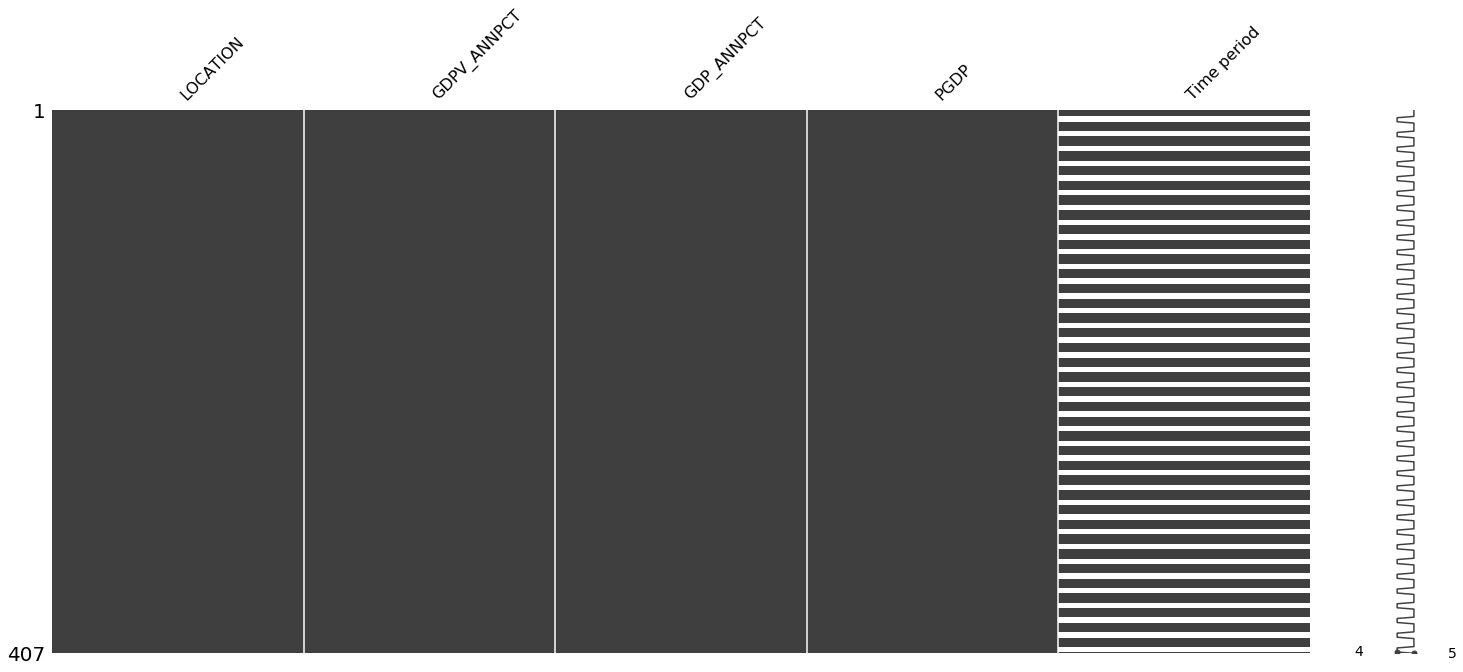

In [7]:
# missing values
display(GDP_OECD.info())

msno.matrix(GDP_OECD)

# split missing and complete values
missing_GDP_OECD = GDP_OECD[GDP_OECD['GDPV_ANNPCT'].isna()]
complete_GDP_OECD = GDP_OECD[~GDP_OECD['GDPV_ANNPCT'].isna()]

### 1.4.2. Explore duplicate entries in the GDP

<blockquote>
    
Let's check if some duplicate values are found in the GDP dataframe. In this case, we will use the .duplicated() method, and we pass the 'keep = False' argument to keep all duplicate entries for further inspection.<br>

We use an assert statement to check that the duplicated dataframe has zero entries. If this assumption is met, then the assert will return nothing.

**Summary:** no duplicate entries are found in the GDP dataframe

</blockquote>

In [8]:
# keep all duplicate entries
GDP_OECD_duplicated = GDP_OECD.duplicated(keep = False)
GDP_OECD[GDP_OECD_duplicated].sort_values(by = 'LOCATION')

# assert the duplicated
assert GDP_OECD[GDP_OECD_duplicated].shape[0] == 0

### 1.4.3. Explore missing values in GERD data

<blockquote>
    
We will use the same methods applied to detect missing values in the GDP data.<br>

**Summary:** from the .info() method we can see that most of the missing values are found in the GERD financed by business and some in the percentage performed by business enterprise columns. Let's extract those countries that have this missing values.<br>

No missing values are found in the GERD performed by business enterprise as a percentage of the GDP, as we have 388 entries in the dataframe.<br>

From the extracted set we can see that Australia, Belgium, Denmark, Greece, Iceland, Luxembourg, The Netherlands, Norway and Sweden are the countries that have missing values in those columns. Thirty missing values are located in the GERD financed by business enterprise column, and 4 in the performed by business enterprise.

</blockquote>

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 388 entries, 2005-01-01 to 2015-01-01
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   LOCATION                          388 non-null    object 
 1   GERD_financed_business_perc       358 non-null    float64
 2   GERD_performed_business_perc      384 non-null    float64
 3   GERD_performed_business_perc_GDP  388 non-null    float64
 4   Time period                       248 non-null    object 
dtypes: float64(3), object(2)
memory usage: 18.2+ KB


None

,0
Indicator,
LOCATION,0
GERD_financed_business_perc,30
GERD_performed_business_perc,4
GERD_performed_business_perc_GDP,0
Time period,33


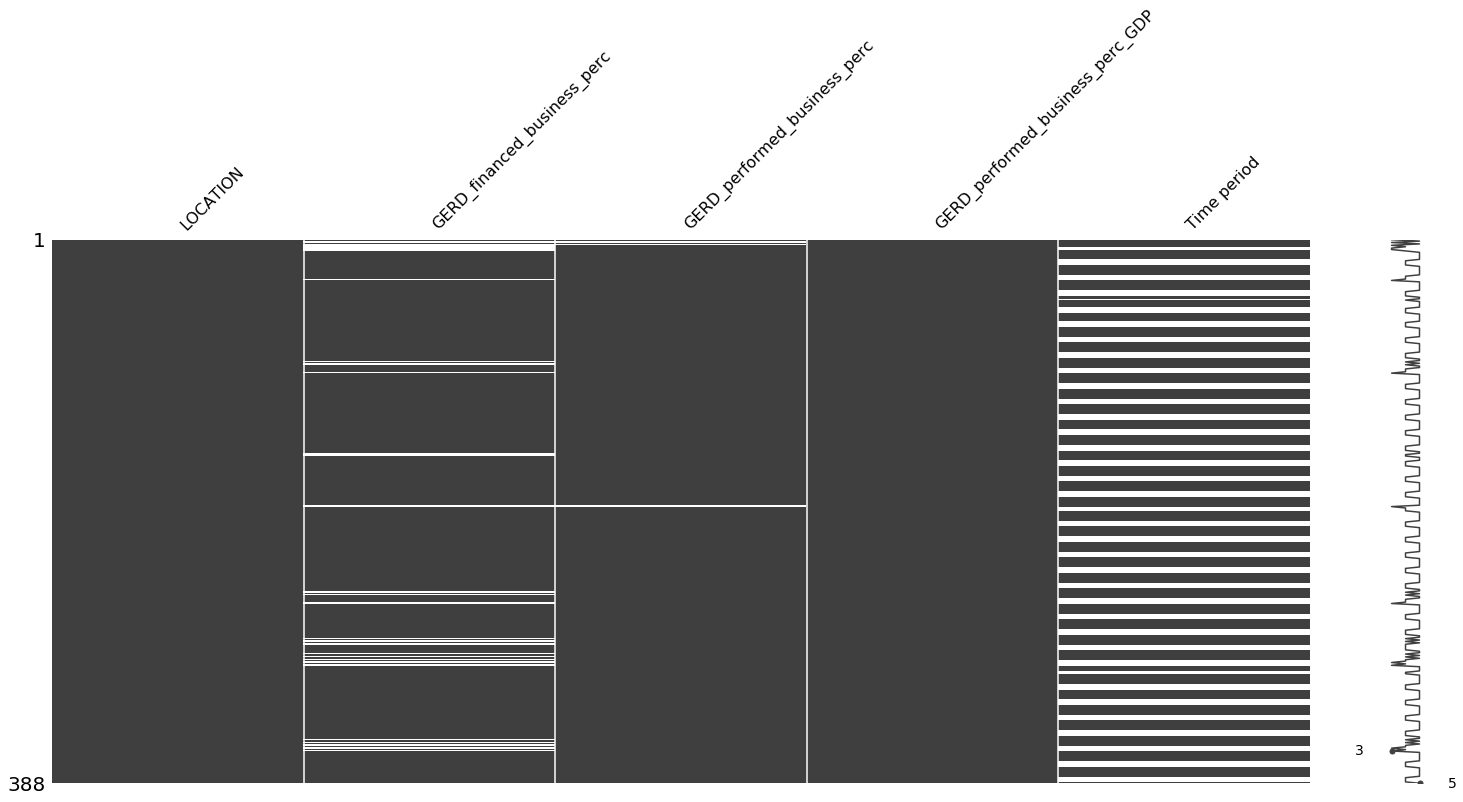

In [9]:
# missing values
display(GERD_OECD.info())

msno.matrix(GERD_OECD)

# split missing and complete values
missing_GERD_OECD_fin = GERD_OECD[GERD_OECD['GERD_financed_business_perc'].isna()]
missing_GERD_OECD_perf = GERD_OECD[GERD_OECD['GERD_performed_business_perc'].isna()]

# countries with missing values
list_MissCountries_fin = list(set(missing_GERD_OECD_fin.LOCATION))
list_MissCountries_perf = list(set(missing_GERD_OECD_perf.LOCATION))

missing_df = pd.DataFrame({'Countries_Missing_Financed': pd.Series(list_MissCountries_fin), 
                           'Countries_Missing_Performed': pd.Series(list_MissCountries_perf)})

display(pd.DataFrame(GERD_OECD[GERD_OECD['LOCATION'].isin(list_MissCountries_fin + list_MissCountries_perf)].isna().sum()))

### 1.4.4. Explore missing values by time period and country in GERD data

<blockquote>
    
We will use the list of missing values in financed by business enterprise, as those two countries in the other list are part of the first one.<br>

From the list of countries with missing values, it is important to check how many missing values per time period we have. In case we have 2 missing values per period, it would be impossible to compute a mean score of that country in that time period. Unless we interpolate those values. However, this could be a sensitive issue concerning the years of the economic crisis, as big changes in the GERD are expected to ocurr in those years. In the case that we have only just one missing value, we can interpolate using the value of one year of that time period.<br>

**Summary:** 
* Percentage of GERD financed by business enterprise: in the case of Australia, we have 2 missing values in the 'after crisis' period, while in the rest of countries we just have 1 missing value at most in the time periods. I will consider to remove Australia from the dataframe, as it would be complicated to interpolate this values, due to the considerable changes that take place during and after an economic crisis in the GERD data.

* Percentage of GERD performed by business enterprise: Australia has 1 missing value in each time period except for the 5 years after crisis period. Iceland only has 1 missing value in the after crisis period.

</blockquote>

In [10]:
# number of missing values per country and time period
GERD_MissCountries = GERD_OECD.loc[GERD_OECD['LOCATION'].isin(list_MissCountries_fin)]

display(GERD_MissCountries.groupby(['LOCATION', 'Time period']).apply(lambda x: x.isna().sum()))

Indicator                      LOCATION  GERD_financed_business_perc  \
LOCATION Time period                                                   
AUS      5 years after crisis         0                            1   
         after crisis                 0                            2   
         before crisis                0                            1   
         during crisis                0                            1   
BEL      5 years after crisis         0                            0   
         after crisis                 0                            0   
         before crisis                0                            0   
         during crisis                0                            0   
DNK      5 years after crisis         0                            0   
         after crisis                 0                            0   
         before crisis                0                            1   
         during crisis                0                            1   
GRC      5 years after crisis         0                            0   
         after crisis                 0                            0   
         before crisis                0                            1   
         during crisis                0                            1   
ISL      5 years after crisis         0                            0   
         after crisis                 0                            1   
         before crisis                0                            0   
         during crisis                0                            0   
LUX      5 years after crisis         0                            0   
         after crisis                 0                            0   
         before crisis                0                            1   
         during crisis                0                            1   
NLD      5 years after crisis         0                            0   
         after crisis                 0                            1   
         before crisis                0                            1   
         during crisis                0                            1   
NOR      5 years after crisis         0                            0   
         after crisis                 0                            1   
         before crisis                0                            1   
         during crisis                0                            1   
SWE      5 years after crisis         0                            0   
         after crisis                 0                            1   
         before crisis                0                            1   
         during crisis                0                            1   

Indicator                      GERD_performed_business_perc  \
LOCATION Time period                                          
AUS      5 years after crisis                             0   
         after crisis                                     1   
         before crisis                                    1   
         during crisis                                    1   
BEL      5 years after crisis                             0   
         after crisis                                     0   
         before crisis                                    0   
         during crisis                                    0   
DNK      5 years after crisis                             0   
         after crisis                                     0   
         before crisis                                    0   
         during crisis                                    0   
GRC      5 years after crisis                             0   
         after crisis                                     0   
         before crisis                                    0   
         during crisis                                    0   
ISL      5 years after crisis                             0   
         after crisis                                     1   
   

### 1.4.5. Earliest entry provided by each country in GERD data

<blockquote>
    
Aside from the missing data per time period, it is also relevant to check the earliest year with information provided by each country. We should consider that we have a few countries that joined the OECD recently:<br>

* Estonia, Israel, Chile and Slovenia joined in 2010.<br> 
* Latvia in 2016.<br>
* Lithuania in 2018.<br>
* Colombia was the last country to join the OECD in 2020

We would like to see if all countries provide information in the GERD dataframe since 2005.<br>

**Summary:** from the resulting dataframe we can see that Chile, Switzerland, and Colombia are the only countries that do not provide information from 2005.<br> 

* In the case of Colombia, the first entry is from 2006.<br>
* Chile provides information from 2007.<br>
* Switzerland provides information from 2008<br>

We should consider the last two cases problematic, as no mean can be computed for the 'before crisis' time period (years 2005 and 2006). In the case of Colombia we can still use the data from 2006 to have an approximation, as changes are not suposse to be very broad between those years. However, in the case of Switzerland we do not have information for the 'before crisis' years, and we also are missing one year of the economic crisis period. As analysis are performed excluding cases pairwise, Switzerland will be excluded when analysing relationships with the before crisis period, but not other associations as valid data is provided.

</blockquote>

In [11]:
# first record of each country
GERD_FirstRec = GERD_OECD.reset_index(drop = False)

display(pd.DataFrame(GERD_FirstRec.groupby(['LOCATION'])['Time'].first().sort_values(ascending = False)).head())

,Time
LOCATION,
CHE,2008-01-01
CHL,2007-01-01
COL,2006-01-01
USA,2005-01-01
ESP,2005-01-01


### 1.4.6. Drop variables with more than 15% of missing values in GERD data

<blockquote>
    
We will consider to remove those variables that contains more than 15% of missing values in the dataframe.

**Summary:** after extracting the percentages of missing values in each variable, we can see that the GERD financed by business enterprise reach a maximum of 7.73% of missing data. Missing values only represent a 1.03% in the other column. As it doesn't reach our cutoff of 15%, we will keep these variables and we will try to interpolate missing data.

</blockquote>

In [12]:
# total number of missing data
GERD_missing_total = GERD_OECD.isnull().sum().sort_values(ascending = False)

# percentage of missing values
GERD_missing_percent = ((GERD_OECD.isnull().sum() * 100) / GERD_OECD.isnull().count()).sort_values(ascending = False)

# concatenate number and percentage of missing data
GERD_missing_data = pd.concat([GERD_missing_total, GERD_missing_percent], axis = 1, 
                              keys = ['Total of missing data', 'Percentage of missing data'])

display(GERD_missing_data.head())

,Total of missing data,Percentage of missing data
Indicator,,
Time period,140,36.082474
GERD_financed_business_perc,30,7.731959
GERD_performed_business_perc,4,1.030928
GERD_performed_business_perc_GDP,0,0.000000
LOCATION,0,0.000000


### 1.4.7. Look for countries with more than the mean + 2SD of missing values in GERD data

<blockquote>
    
We have checked the percentage of missing data per variable. However, it will be also interesting to check what the percentage of missing values each country has in each variable. In this case we will consider to drop countries that accumulate more than the mean plus two standard deviations of each variable.<br>

As the majority of missing values were found in the GERD financed by business enterprise variables, we will compute the mean and SD os missing values in this column.<br>

**Summary:** we can see that Australia, Sweden and Norway will be dropped from the GERD dataframe, as they contain a higher percentage of missing values. We were already considering to drop Australia because of the missing values in the 'after crisis' period. In this case that problem was sorted. Also, in the case of the percentage of GERD financed by business enterprise we can see that only Australia is the country that exceds the maximum of the mean + 2SD.

</blockquote>

In [13]:
# compute percentage of missing values by column per Country
GERD_MissPerc_Country = pd.DataFrame()
for col in GERD_OECD.columns:
    GERD_MissPerc_Country[col] = GERD_OECD.groupby(['LOCATION'])[col].apply(lambda x: x.isna().mean().round(4) * 100)

# mean and standard deviation for financed data
GERD_MissingMean_fin = GERD_MissPerc_Country['GERD_financed_business_perc'].mean()
GERD_MissingSD_fin = GERD_MissPerc_Country['GERD_financed_business_perc'].std()

# mean and standard deviation for performed data
GERD_MissingMean_perf = GERD_MissPerc_Country['GERD_performed_business_perc'].mean()
GERD_MissingSD_perf = GERD_MissPerc_Country['GERD_performed_business_perc'].std()

print('For the percentage of GERD financed by business enterprise: ' + '\n'
      'the mean of missing values is: ' + str(round(GERD_MissingMean_fin, 2)) + '\n'
      'the SD of missing values is: ' + str(round(GERD_MissingSD_fin, 2)) + '\n'
      'and the mean + 2SD is: ' + str(round(GERD_MissingMean_fin + (2*GERD_MissingSD_fin), 2)) + '\n' + '\n'
      'For the percentage of GERD performed by business enterprise: ' + '\n' +
      'the mean of missing values is: ' + str(round(GERD_MissingMean_perf, 2)) + '\n' + \
      'the SD of missing values is: ' + str(round(GERD_MissingSD_perf, 2)) + '\n' + \
      'and the mean + 2SD is: ' + str(round(GERD_MissingMean_perf + (2*GERD_MissingSD_perf), 2)))

display(GERD_MissPerc_Country.sort_values(by = 'GERD_financed_business_perc', ascending = False).head(10))

# store countries with a high percentage of missing values in a list
list_HighMiss_Countries_fin = list(GERD_MissPerc_Country[GERD_MissPerc_Country['GERD_financed_business_perc'] > (GERD_MissingMean_fin + (2*GERD_MissingSD_fin))].index)
list_HighMiss_Countries_perf = list(GERD_MissPerc_Country[GERD_MissPerc_Country['GERD_performed_business_perc'] > (GERD_MissingMean_perf + (2*GERD_MissingSD_perf))].index)

For the percentage of GERD financed by business enterprise: 
the mean of missing values is: 7.78
the SD of missing values is: 17.23
and the mean + 2SD is: 42.24

For the percentage of GERD performed by business enterprise: 
the mean of missing values is: 1.17
the SD of missing values is: 5.68
and the mean + 2SD is: 12.52


,LOCATION,GERD_financed_business_perc,GERD_performed_business_perc,GERD_performed_business_perc_GDP,Time period
LOCATION,,,,,
AUS,0.0,77.78,33.33,0.0,22.22
SWE,0.0,45.45,0.00,0.0,36.36
NOR,0.0,45.45,0.00,0.0,36.36
DNK,0.0,27.27,0.00,0.0,36.36
NLD,0.0,27.27,0.00,0.0,36.36
LUX,0.0,27.27,0.00,0.0,36.36
GRC,0.0,18.18,0.00,0.0,36.36
ISL,0.0,10.00,10.00,0.0,30.00
BEL,0.0,9.09,0.00,0.0,36.36


### 1.4.8. Split GERD dataframe

<blockquote>
    
We could also consider to drop these three countries just for the analysis concerning the GERD financed by business enterprise. As we have just 37 countries, we will create separate dataframes for GERD financed and performed by business enterprise variables. If we drop this countries in the dataframe, we are removing an 8% of useful data from the GERD performed variables.<br>

We will do the same for the GERD performed by business enterprise as only Australia will be removed from that dataframe in this case.

We will store countries with a higher percentage of missing values in a list for each dataframe, so we can drop them from their corresponding dataframe and check again for missing values.

</blockquote>

In [14]:
GERD_OECD_financed = GERD_OECD.filter(items = ['LOCATION', 'GERD_financed_business_perc', 'Time period'])
GERD_OECD_performed = GERD_OECD.filter(items = ['LOCATION', 'GERD_performed_business_perc', 'GERD_performed_business_perc_GDP', 'Time period'])

### 1.4.9. Drop countries with more than mean + 2SD of  missing values in GERD data

<blockquote>
    
We will drop this countries and check again how many we have left from the original sample in the GERD financed and performed dataframes, as well as the number of missing values we still have.

In the next step, we will perform a left merge as we have more countries in the performed dataframe compared to the financed. Those countries that are missing in the financed dataframe will display NaN values.

</blockquote>

In [15]:
# drop countries
GERD_OECD_financed = GERD_OECD_financed[~GERD_OECD_financed['LOCATION'].isin(list_HighMiss_Countries_fin)]
GERD_OECD_performed = GERD_OECD_performed[~GERD_OECD_performed['LOCATION'].isin(list_HighMiss_Countries_perf)]

print('We still have ' + str((len(set(GERD_OECD_financed.LOCATION)))) + ' countries of the 37 member countries of the OECD with financed by business enterprise data')
print('We still have ' + str((len(set(GERD_OECD_performed.LOCATION)))) + ' countries of the 37 member countries of the OECD with performed by business enterprise data' + '\n')

# check missing values
display(GERD_OECD_financed.info())
display(GERD_OECD_performed.info())

We still have 34 countries of the 37 member countries of the OECD with financed by business enterprise data
We still have 36 countries of the 37 member countries of the OECD with performed by business enterprise data

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 357 entries, 2005-01-01 to 2015-01-01
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   LOCATION                     357 non-null    object 
 1   GERD_financed_business_perc  344 non-null    float64
 2   Time period                  227 non-null    object 
dtypes: float64(1), object(2)
memory usage: 11.2+ KB


None

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 379 entries, 2005-01-01 to 2015-01-01
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   LOCATION                          379 non-null    object 
 1   GERD_performed_business_perc      378 non-null    float64
 2   GERD_performed_business_perc_GDP  379 non-null    float64
 3   Time period                       241 non-null    object 
dtypes: float64(2), object(2)
memory usage: 14.8+ KB


None

### 1.4.10. Interpolate missing values in GERD data

<blockquote>
    
As we still have some missing data, we will interpolate them data using .interpolate() and specifying a 'linear' method. The interpolation will be performed by country, to avoid the interpolatino with data from other countries. We will set the limit of NaN values to interpolate to two. I would prefer to specify a limit of one, however, only one missing value is left after setting the limit to one, and this value is not at the beginning or end of the country data. If the occurence of the missing data is in the first entry of a country, we will fill backwards, but if it is the last, we will fill forwards.

In the interpolation process we will limit the area to 'inside' to interpolate missing values only surrounded by valid data.

After the interpolation, we will check for missing values, and if some missing values are still on place, we will use a fill method.

**Summary:** after the interpolation we can see that no missing values are left in the GERD financed and performed dataframes, and there is no need to fill NaN values.

</blockquote>

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 357 entries, 2005-01-01 to 2015-01-01
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   LOCATION                     357 non-null    object 
 1   GERD_financed_business_perc  357 non-null    float64
 2   Time period                  227 non-null    object 
dtypes: float64(1), object(2)
memory usage: 11.2+ KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 379 entries, 2005-01-01 to 2015-01-01
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   LOCATION                          379 non-null    object 
 1   GERD_performed_business_perc      379 non-null    float64
 2   GERD_performed_business_perc_GDP  379 non-null    float64
 3   Time period                       241 non-null    object 
dtypes: float64(2), object(2)
mem

None

None

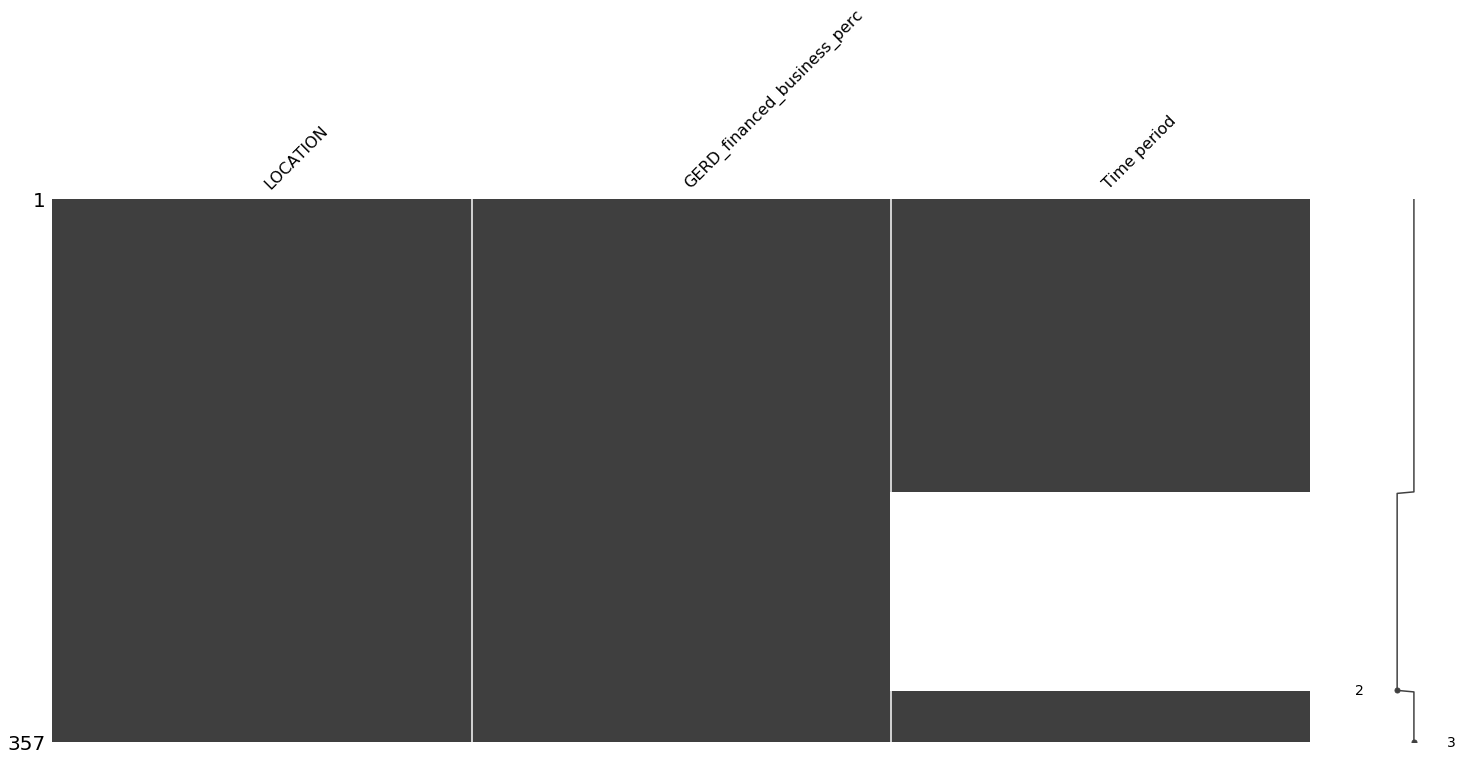

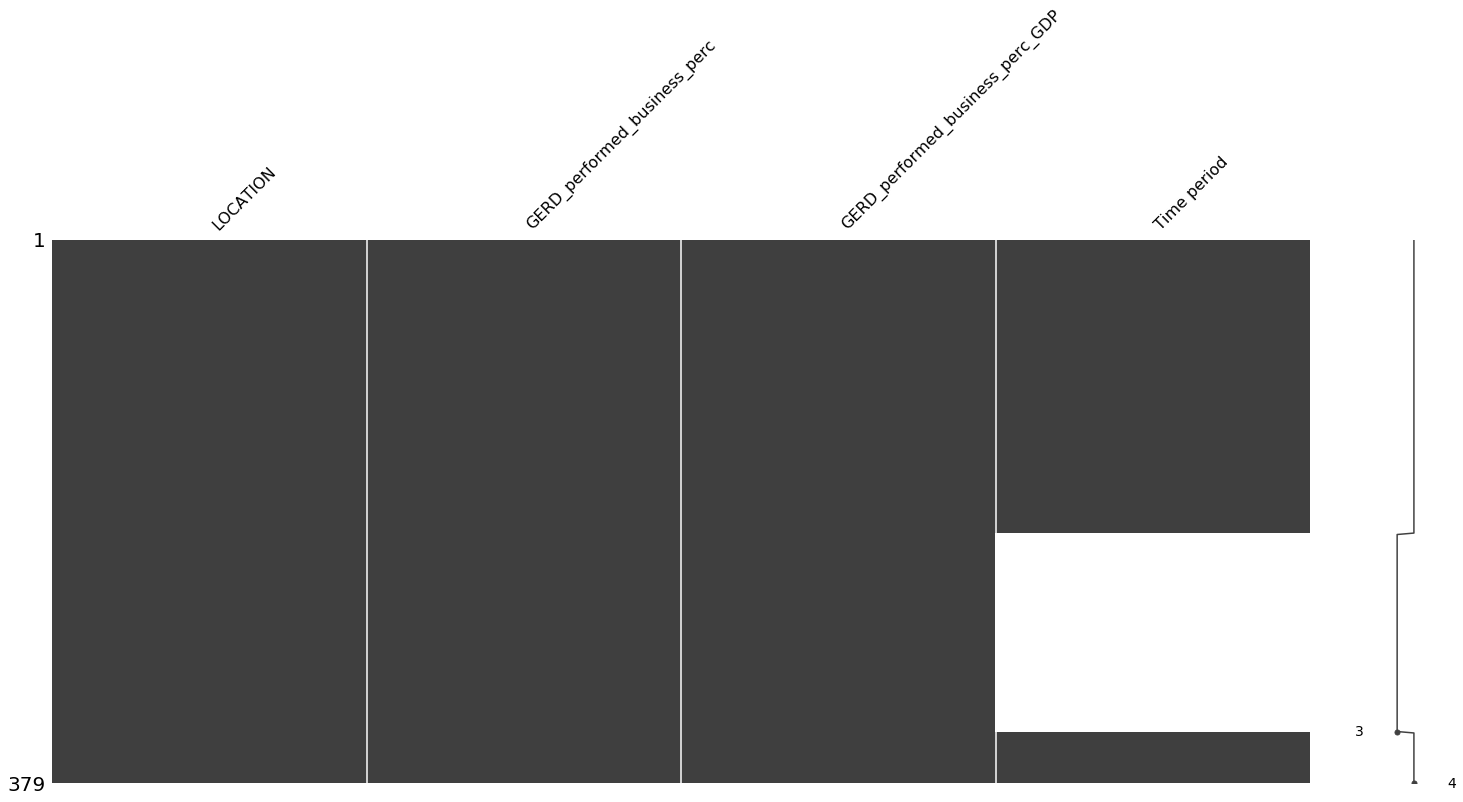

In [16]:
# interpolate
GERD_OECD_financed = GERD_OECD_financed.groupby(['LOCATION']).apply(lambda country: country.interpolate(method = 'linear', 
                                                                                                        limit = 2, 
                                                                                                        limit_area = 'inside'))
GERD_OECD_performed = GERD_OECD_performed.groupby(['LOCATION']).apply(lambda country: country.interpolate(method = 'linear', 
                                                                                                          limit = 2, 
                                                                                                          limit_area = 'inside'))
# check missing values
msno.matrix(GERD_OECD_financed)
msno.matrix(GERD_OECD_performed)

# split missing and complete values in the df
missing_GERD_financed = GERD_OECD_financed[GERD_OECD_financed['GERD_financed_business_perc'].isna()]
complete_GERD_financed = GERD_OECD_financed[~GERD_OECD_financed['GERD_financed_business_perc'].isna()]

missing_GERD_performed = GERD_OECD_performed[GERD_OECD_performed['GERD_performed_business_perc'].isna()]
complete_GERD_performed = GERD_OECD_performed[~GERD_OECD_performed['GERD_performed_business_perc'].isna()]

display(GERD_OECD_financed.info(), GERD_OECD_performed.info())

### 1.4.11. Explore duplicated entries in GERD data

<blockquote>

Let's check if some duplicate values are found in the GERD dataframe. As with the GDP data, we will use the .duplicated() method, and we pass the 'keep = False' argument to keep all duplicate entries for further inspection.<br>

We use an assert statement to check that the duplicated dataframe has a zero entries. If this assumption is met, then the assert would return nothing.

**Summary:**  we see that a duplicated value is found for Iceland in the years 2007 and 2008. Exploring this duplicated value it is due the original dataset includes the same information for the years 2007 and 2008. As this information is provided by the original dataset, we will not modify it.

</blockquote>

In [17]:
GERD_financed_duplicated = GERD_OECD_financed.duplicated(keep = False)
GERD_performed_duplicated = GERD_OECD_performed.duplicated(keep = False)

assert GERD_OECD_financed[GERD_financed_duplicated].shape[0] == 0
assert GERD_OECD_performed[GERD_performed_duplicated].shape[0] == 0

AssertionError: 

In [ ]:
display(GERD_OECD_financed[GERD_financed_duplicated])

### 1.4.12. Merge both GERD dataframes

<blockquote>

We will merge both dataframes again using a left merge as the 'performed' dataframe has more countries than the 'financed', so we will have NaN values for Sweden and Norway in the financed by business enterprise columns. We do this to ease the data analysis process. The analysis won't be affected by this missing values, as we are applying a pairwise nan policy in the analysis, so this missing values will be ignored when analysing the financed columns but not for the performed columns.

**Summary:** we can see that NaN values are displayed for those countries removed in the GERD_OECD_financed dataframe. Let's display Norway data in example.

</blockquote>

In [ ]:
GERD_OECD = GERD_OECD_performed.merge(GERD_OECD_financed, how = 'left', on = ['Time', 'LOCATION', 'Time period'])

display(GERD_OECD.info())
display(len(GERD_OECD), GERD_OECD[GERD_OECD['LOCATION'] == 'NOR'])

### 1.4.13. Compute the mean of data for each time period in GDP and GERD data

<blockquote>

Once we have cleaned both dataframes and interpolate data, we will compute the mean of the years that are part of each time period.

</blockquote>

In [18]:
dfs = {'GDP_OECD_periods': GDP_OECD, 
       'GERD_OECD_periods': GERD_OECD}

dfs_new = []
for df_new, df in dfs.items():
    df_new = df.groupby(['LOCATION', 'Time period']).mean().reset_index(drop = False)
    dfs_new.append(df_new)

GDP_OECD_periods, GERD_OECD_periods = dfs_new
    
display(GDP_OECD_periods.head(), GERD_OECD_periods.head())

VARIABLE,LOCATION,Time period,GDPV_ANNPCT,GDP_ANNPCT,PGDP
0,AUS,5 years after crisis,2.291594,1.639225,0.948468
1,AUS,after crisis,2.167884,5.096404,0.877910
2,AUS,before crisis,2.910407,7.843265,0.748595
3,AUS,during crisis,3.485093,9.098500,0.826548
4,AUT,5 years after crisis,0.976060,3.291252,1.000000


Indicator,LOCATION,Time period,GERD_financed_business_perc,GERD_performed_business_perc,GERD_performed_business_perc_GDP
0,AUS,5 years after crisis,NaN,53.43116,1.025570
1,AUS,after crisis,NaN,58.24648,1.356915
2,AUS,before crisis,58.06899,58.03914,1.199850
3,AUS,during crisis,61.90762,61.10159,1.426760
4,AUT,5 years after crisis,49.73950,71.41998,2.178160


## 1.5. Save data

In [19]:
%store GDP_OECD
%store GERD_OECD
%store GDP_OECD_periods
%store GERD_OECD_periods
%store GERD_OECD_financed
%store GERD_OECD_performed

Stored 'GDP_OECD' (DataFrame)
Stored 'GERD_OECD' (DataFrame)
Stored 'GDP_OECD_periods' (DataFrame)
Stored 'GERD_OECD_periods' (DataFrame)
Stored 'GERD_OECD_financed' (DataFrame)
Stored 'GERD_OECD_performed' (DataFrame)
